## EDA APLICADO A CULQI

In [ ]:
#Cargamos nuestra data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

culqi_df = pd.read_excel("/content/drive/MyDrive/1 Bootcamp_Python_DSRP/6_Sexta_Clase/Ejercicio 2_.xlsx")

culqi_df.head(3)

cdf = culqi_df.dropna()

FileNotFoundError: ignored

In [ ]:
cdf.shape

(5034, 11)

In [ ]:
cdf.head(4)

,FECHA VENTA,CANAL VENTA,RUC CLIENTE,VENDEDOR,VENTA ACTIVA,FECHA ACTIVACION,FLUJO MES VENTA,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO
13920,2022-01-17,DEALERS,GJFGCACJ,OMAR BUSTAMANTE,1,2022-01-25,100.0,SERVICIO,LIMA,OFFLINE,CULQI PRO
13921,2022-02-16,DEALERS,DHAGICHD,MARCO CHANAME,1,2022-02-25,100.0,COMERCIO,LIMA,OFFLINE,CULQI PRO
13922,2022-02-17,DEALERS,GEDBJJBA,RUTH PEREYRA,1,2022-02-27,100.0,TRANSPORTE,LIMA,OFFLINE,CULQI PRO
13924,2022-03-22,BANCOS,BJFJCFHGJFA,JORGE SALAZAR,1,2022-03-29,100.0,RESTAURANTES,CALLAO,OFFLINE,CULQI PRO


Distribución de Variables:

*  ¿Cuáles son los canales de venta más comunes?
*  ¿Qué productos se venden más?
*  ¿Cómo se distribuyen las ventas entre los diferentes departamentos?
*  ¿Hay algún vendedor específico que tenga un rendimiento notablemente alto o bajo?

In [ ]:
#¿Cuales son los canale de venta más comunes?

canales=culqi_df['canal venta'].value_counts()
print("canales de ventas comunes:")
print(canales)

In [ ]:
sns.catplot(
    data=cdf,
    x='CANAL VENTA',
    kind='count'
)
plt.show()

In [ ]:
cdf['PRODUCTO'].value_counts()

CULQI FULL      3690
CULQI PRO        654
CULQI MINI       250
SUPER POS        221
CULQI LINK       172
CULQI ONLINE      47
Name: PRODUCTO, dtype: int64

<Figure size 1000x2000 with 0 Axes>

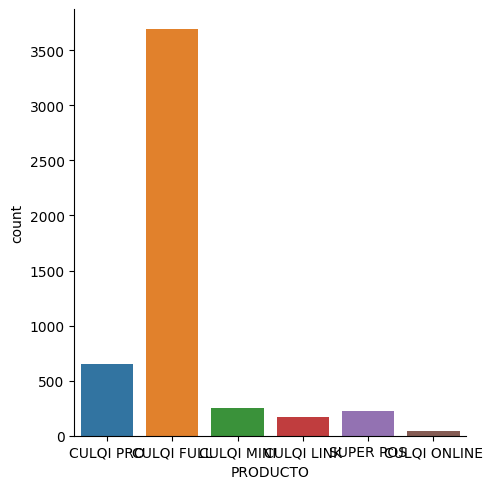

In [ ]:
#¿Que productos se venden más?

plt.figure(figsize=(10,20)),
sns.catplot(
    data=cdf,
    x='PRODUCTO',
    kind='count'
)
plt.show()


In [ ]:
#¿Cómo se distribuyen las ventas entre los diferentes departamentos?
Ventas_Departamento=cdf.groupby('DEPARTAMENTO')['VENTA ACTIVA'].sum()
print(Ventas_Departamento)


DEPARTAMENTO
AMAZONAS               28
ANCASH                 33
APURIMAC               13
AREQUIPA              125
AYACUCHO               36
CAJAMARCA              51
CALLAO                104
CUSCO                 128
DIOS                    1
HUANCAVELICA            8
HUANUCO                98
ICA                   314
JUNIN                 325
LA LIBERTAD           342
LAMBAYEQUE            205
LIBERTAD               50
LIMA                 2766
LORETO                110
MADRE DE DIOS           7
MARTIN                  1
MOQUEGUA               16
PASCO                  23
PIURA                  77
PROVINCIA DE LIMA       7
PUNO                    8
SAN MARTIN             88
TACNA                  23
TUMBES                  3
UCAYALI                44
Name: VENTA ACTIVA, dtype: int64


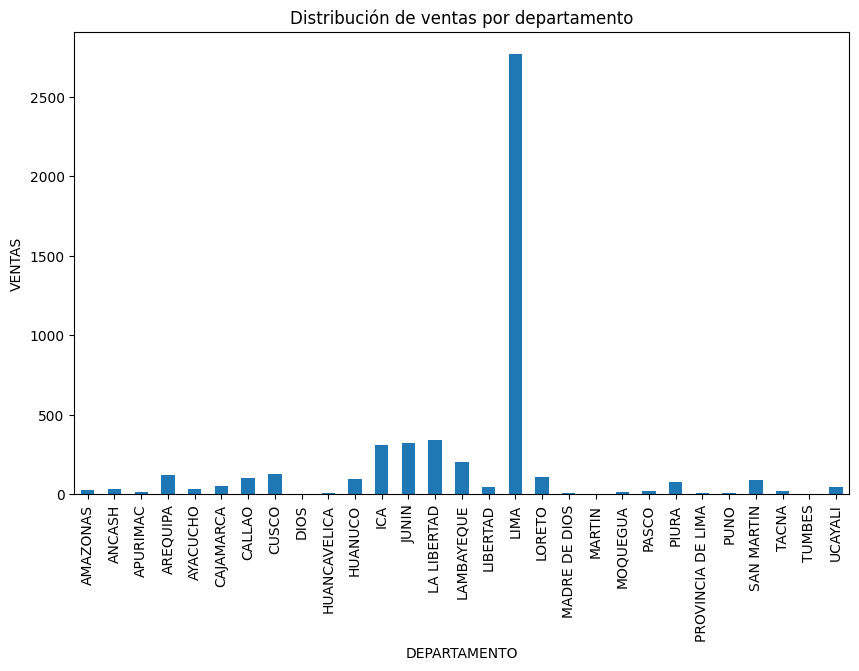

In [ ]:
Ventas_Departamento.plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de ventas por departamento')
plt.xlabel('DEPARTAMENTO')
plt.ylabel('VENTAS')
plt.show()

In [ ]:
#¿Hay algún vendedor específico que tenga un rendimiento notablemente alto o bajo?

# Calcular el total de ventas por vendedor
ventas_por_vendedor =culqi_df.groupby('VENDEDOR')['FLUJO MES VENTA'].sum()
ventas_por_vendedor.sort_values(ascending=False)

VENDEDOR
ND                   126168.0
OMAR BUSTAMANTE       85959.0
STEPHANIE MORANTE     80700.0
AUGUSTO HORNA         68711.0
LUIS LEON             64966.0
                       ...   
JOSE CAJO                 0.0
JORGE PEREZ               0.0
JORGE ESTRADA             0.0
JOHN SARZOSA              0.0
ZULEMA NEYRA              0.0
Name: FLUJO MES VENTA, Length: 954, dtype: float64

In [ ]:
# Vendedor con las ventas más altas
vendedor_mas_ventas = ventas_por_vendedor.idxmax()
ventas_mas_altas = ventas_por_vendedor.max()
print(vendedor_mas_ventas)
print(ventas_mas_altas)

ND 
126168.0


In [ ]:
# Vendedor con las ventas más bajas
vendedor_menos_ventas = ventas_por_vendedor.idxmin()
ventas_mas_bajas = ventas_por_vendedor.min()
print(vendedor_menos_ventas)
print(ventas_mas_bajas)

ADA NUÑEZ
0.0


Análisis Temporal:

* ¿Hay alguna tendencia observable en las ventas a lo largo del tiempo?
* ¿Existen patrones estacionales o eventos específicos que afecten las ventas?

<Axes: xlabel='FECHA VENTA'>

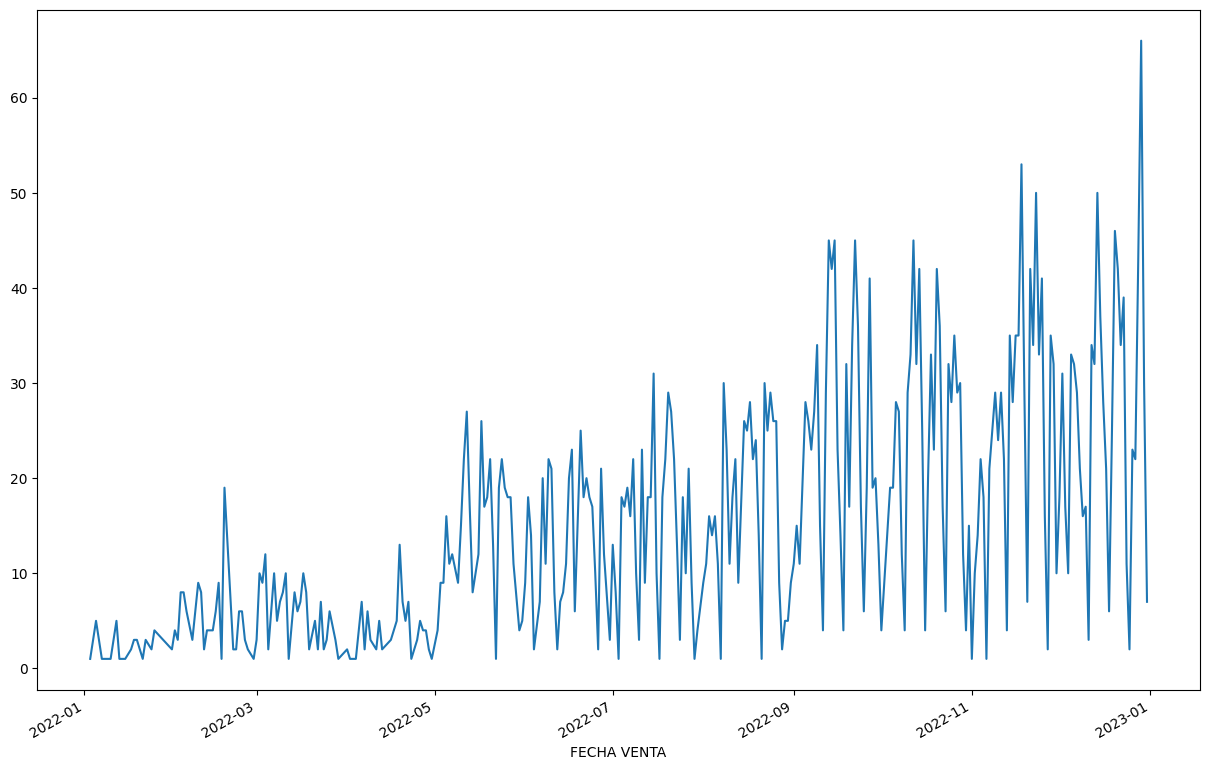

In [ ]:
#¿Hay alguna tendencia observable en las ventas a lo largo del tiempo?
plt.figure(figsize=(15,10))
ventas_diarias = cdf.groupby('FECHA VENTA').size()
ventas_diarias.plot()



In [ ]:
#¿Existen patrones estacionales o eventos específicos que afecten las ventas?
#Si existen patron estacional en el ultimo trimestre del año.
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5034 entries, 13920 to 19345
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA VENTA       5034 non-null   datetime64[ns]
 1   CANAL VENTA       5034 non-null   object        
 2   RUC CLIENTE       5034 non-null   object        
 3   VENDEDOR          5034 non-null   object        
 4   VENTA ACTIVA      5034 non-null   int64         
 5   FECHA ACTIVACION  5034 non-null   datetime64[ns]
 6   FLUJO MES VENTA   5034 non-null   float64       
 7   GIRO ECONOMICO    5034 non-null   object        
 8   DEPARTAMENTO      5034 non-null   object        
 9   TIPO PRODUCTO     5034 non-null   object        
 10  PRODUCTO          5034 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 471.9+ KB


Relaciones:

* ¿Hay alguna relación entre el canal de venta y el tipo de producto?
* ¿Los diferentes giros económicos prefieren ciertos productos o canales sobre otros?

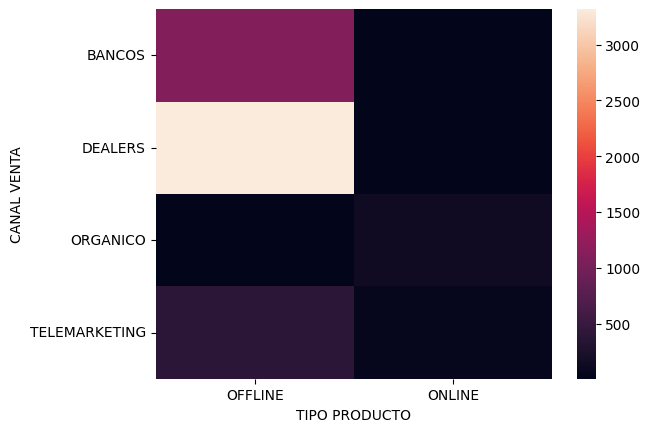

In [ ]:
#¿Hay alguna relación entre el canal de venta y el tipo de producto?
tab = pd.crosstab(cdf['CANAL VENTA'],cdf['TIPO PRODUCTO'])

sns.heatmap(tab)
plt.show()


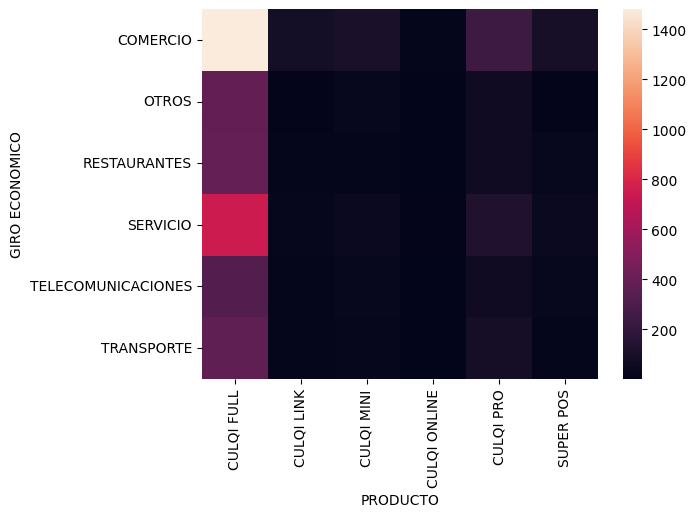

In [ ]:
#¿Los diferentes giros económicos prefieren ciertos productos o canales sobre otros?
tab = pd.crosstab(cdf['GIRO ECONOMICO'],cdf['PRODUCTO'])

sns.heatmap(tab)
plt.show()


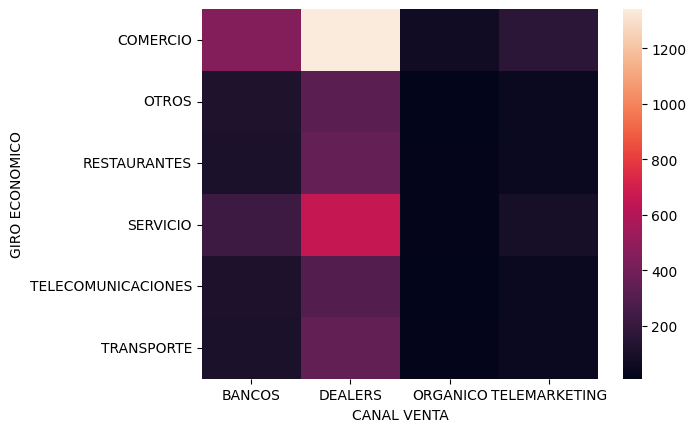

In [ ]:
tab = pd.crosstab(cdf['GIRO ECONOMICO'],cdf['CANAL VENTA'])

sns.heatmap(tab)
plt.show()

Análisis de Clientes:

* ¿Cuántos clientes únicos hay en el dataset (basándonos en 'RUC CLIENTE')?
* ¿Hay clientes que compren repetidamente o que tengan un alto volumen de compras?

In [ ]:
#¿Cuántos clientes únicos hay en el dataset (basándonos en 'RUC CLIENTE')?
clientes_unicos = cdf['RUC CLIENTE'].nunique()

clientes_unicos


4445

In [ ]:
clientes_unicos = cdf['RUC CLIENTE'].unique()

print(clientes_unicos)

['GJFGCACJ' 'DHAGICHD' 'GEDBJJBA' ... 'DACDDIFJ' 'DHDJDAIE' 'BJFJIGGHGAH']


In [ ]:
#¿Hay clientes que compren repetidamente o que tengan un alto volumen de compras?
df = cdf['RUC CLIENTE'].value_counts()

Top_5 = df.head(5)

print(Top_5)


BJFJHHCHEDG    27
BJFJDCCIDFE    16
BJDHFEFBCDA     9
BJFJICJFFFB     9
BJFJJDHIAEB     9
Name: RUC CLIENTE, dtype: int64
